# Importing required Libraries

In [113]:
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [114]:
import pandas as pd
data=pd.read_csv('aggregate_covid_country.csv')
df=pd.DataFrame(data)
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [115]:
df.shape

(23688, 5)

In [116]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [117]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


# EDA Process

# Checking Null Values

In [119]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
df.isnull()

,Date,Country,Confirmed,Recovered,Deaths
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
23683,False,False,False,False,False
23684,False,False,False,False,False
23685,False,False,False,False,False
23686,False,False,False,False,False


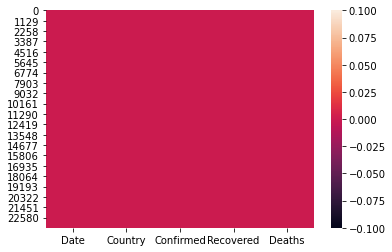

In [121]:
sns.heatmap(df.isnull())

In [122]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

# We need to check how many countries are there in the dataset.

In [123]:
df.drop_duplicates('Country')

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
183,2020-01-22,West Bank and Gaza,0,0,0
184,2020-01-22,Western Sahara,0,0,0
185,2020-01-22,Yemen,0,0,0
186,2020-01-22,Zambia,0,0,0


# There are 188 countries' data in the dataset

In [124]:
df[-1:]

,Date,Country,Confirmed,Recovered,Deaths
23687,2020-05-26,Zimbabwe,56,25,4


The last date is 2020-05-26.

Let's check how many countries's updates are there on the last date ie 2020-05-26.

In [125]:
val=df['Date']=='2020-05-26'
val

0        False
1        False
2        False
3        False
4        False
         ...  
23683     True
23684     True
23685     True
23686     True
23687     True
Name: Date, Length: 23688, dtype: bool

In [126]:
last_date_df=df[val]
last_date_df

,Date,Country,Confirmed,Recovered,Deaths
23500,2020-05-26,Afghanistan,11831,1128,220
23501,2020-05-26,Albania,1029,803,33
23502,2020-05-26,Algeria,8697,4918,617
23503,2020-05-26,Andorra,763,676,51
23504,2020-05-26,Angola,70,18,4
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


There are all 188 countries's updates on the last date.

So we will proceed with this new sub dataset. As it is the updated one in the dataset.

# Saving the Dataset as renaming as new_df

In [127]:
new_df=last_date_df
new_df

,Date,Country,Confirmed,Recovered,Deaths
23500,2020-05-26,Afghanistan,11831,1128,220
23501,2020-05-26,Albania,1029,803,33
23502,2020-05-26,Algeria,8697,4918,617
23503,2020-05-26,Andorra,763,676,51
23504,2020-05-26,Angola,70,18,4
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [128]:
new_df.shape

(188, 5)

Indexing the Dataframe

In [129]:
new_df.index=range(0,188)
new_df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-05-26,Afghanistan,11831,1128,220
1,2020-05-26,Albania,1029,803,33
2,2020-05-26,Algeria,8697,4918,617
3,2020-05-26,Andorra,763,676,51
4,2020-05-26,Angola,70,18,4
...,...,...,...,...,...
183,2020-05-26,West Bank and Gaza,429,365,3
184,2020-05-26,Western Sahara,9,6,1
185,2020-05-26,Yemen,249,10,49
186,2020-05-26,Zambia,920,336,7


In [130]:
new_df.describe()

,Confirmed,Recovered,Deaths
count,1.880000e+02,188.000000,188.000000
mean,2.973205e+04,12164.659574,1864.111702
std,1.335368e+05,39401.499530,8727.269211
min,2.000000e+00,0.000000,0.000000
25%,3.262500e+02,123.500000,6.000000
50%,1.486500e+03,700.500000,34.500000
75%,1.131050e+04,5045.250000,267.500000
max,1.680913e+06,384902.000000,98913.000000


There are huge differences between 75% and max values of every columns

As Date Column values is same for all the rows, let's drop this column.

In [131]:
new_df=new_df.drop(['Date'],axis=1)
new_df

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,11831,1128,220
1,Albania,1029,803,33
2,Algeria,8697,4918,617
3,Andorra,763,676,51
4,Angola,70,18,4
...,...,...,...,...
183,West Bank and Gaza,429,365,3
184,Western Sahara,9,6,1
185,Yemen,249,10,49
186,Zambia,920,336,7


# Bivariate Analysis

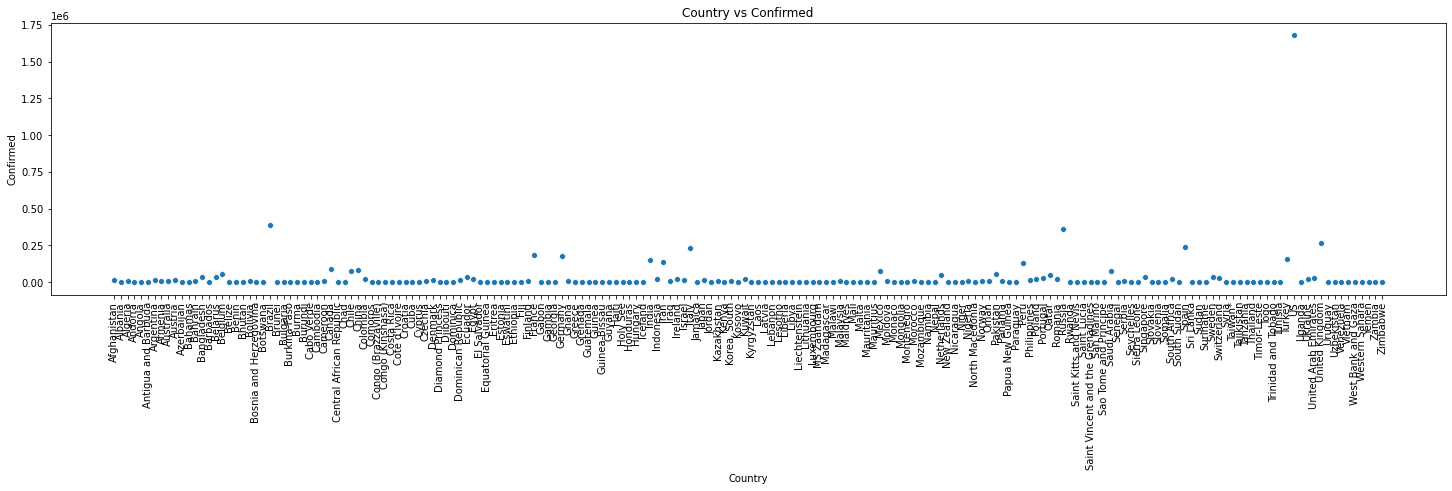

In [132]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
sns.scatterplot(x=new_df['Country'],y=new_df['Confirmed'],data=new_df)
plt.title('Country vs Confirmed')
plt.show()

As there are 188 Countries it is difficult to spot in visualization which country has highest confirmed case.

# Let's find out what are the countries that have the maximum confirmed, recovered and death cases.

In [133]:
cnf=new_df['Confirmed']==new_df['Confirmed'].max()
max_cnf=new_df[cnf]
max_cnf

,Country,Confirmed,Recovered,Deaths
174,US,1680913,384902,98913


Observation:
    
    US has highest confirmed cases.

In [134]:
rcv=new_df['Recovered']==new_df['Recovered'].max()
max_rcv=new_df[rcv]
max_rcv

,Country,Confirmed,Recovered,Deaths
174,US,1680913,384902,98913


Observation:
    
    US has also highest recovered cases.

In [135]:
death=new_df['Deaths']==new_df['Deaths'].max()
max_death=new_df[death]
max_death

,Country,Confirmed,Recovered,Deaths
174,US,1680913,384902,98913


Observation:
    
    US has also highest death cases.

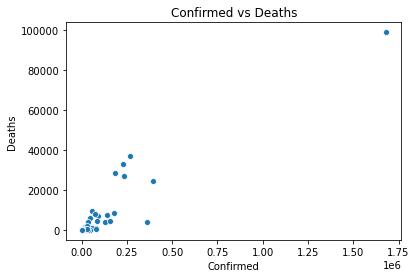

In [136]:
sns.scatterplot(x=new_df['Confirmed'],y=new_df['Deaths'],data=new_df)
plt.title('Confirmed vs Deaths')
plt.show()

Observation:

Confirmed cases and Death cases are in almost linear relationship.

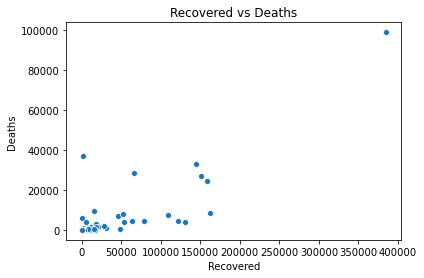

In [137]:
sns.scatterplot(x=new_df['Recovered'],y=new_df['Deaths'],data=new_df)
plt.title('Recovered vs Deaths')
plt.show()

Observation:

Recovered cases and Death cases are also in almost a linear relationship.

As all the rows of Country column is unique value, we can drop country column. It is not affecting much to the model

In [138]:
new_df=new_df.drop(['Country'],axis=1)

In [139]:
new_df

,Confirmed,Recovered,Deaths
0,11831,1128,220
1,1029,803,33
2,8697,4918,617
3,763,676,51
4,70,18,4
...,...,...,...
183,429,365,3
184,9,6,1
185,249,10,49
186,920,336,7


# Let's find out total cases:

In [140]:
print("Total Confirmed Case=",new_df['Confirmed'].sum())

Total Confirmed Case= 5589626


In [141]:
print("Total Recovered Case=",new_df['Recovered'].sum())

Total Recovered Case= 2286956


In [142]:
print("Total Deaths=",new_df['Deaths'].sum())

Total Deaths= 350453


# Multivariate Analysis

In [143]:
new_df_corr=new_df.corr()
new_df_corr

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.895985,0.934197
Recovered,0.895985,1.000000,0.836431
Deaths,0.934197,0.836431,1.000000


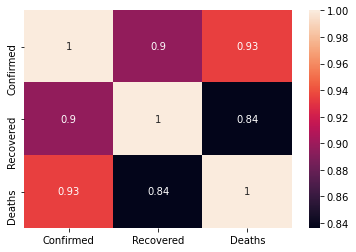

In [144]:

sns.heatmap(new_df_corr,annot=True)

Observation:

Both Confirmed and Recovered are highly correlated with Deaths

# Checking Outliers

In [145]:
new_df.shape

(188, 3)

{'whiskers': [<matplotlib.lines.Line2D at 0x23f5d8bd7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x23f5d8bb430>,
 'boxes': [<matplotlib.lines.Line2D at 0x23f5d8bda00>],
 'medians': [<matplotlib.lines.Line2D at 0x23f5d8bbaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23f5d8bbdf0>],
 'means': []}

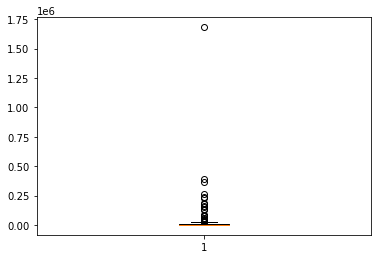

In [146]:
plt.boxplot(new_df['Confirmed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23f5ddd5b50>,
 'caps': [<matplotlib.lines.Line2D at 0x23f5dde0250>,
 'boxes': [<matplotlib.lines.Line2D at 0x23f5ddd57f0>],
 'medians': [<matplotlib.lines.Line2D at 0x23f5dde0910>],
 'fliers': [<matplotlib.lines.Line2D at 0x23f5dde0c10>],
 'means': []}

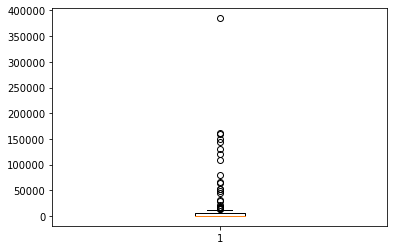

In [147]:
plt.boxplot(new_df['Recovered'])

There are many outliers in the dataset.

# Removing Outliers

zscore Method

In [148]:
import scipy
from scipy.stats import zscore
z=np.abs(zscore(new_df))
threshold=3
new_df1=new_df[(z<3).all(axis=1)]

In [149]:
new_df1

,Confirmed,Recovered,Deaths
0,11831,1128,220
1,1029,803,33
2,8697,4918,617
3,763,676,51
4,70,18,4
...,...,...,...
183,429,365,3
184,9,6,1
185,249,10,49
186,920,336,7


In [150]:
new_df.shape

(188, 3)

In [151]:
new_df1.shape

(180, 3)

Percentage of dataloss during removal of outliers using zscore method

In [152]:
P1=(188-180)*100/188
P1

4.25531914893617

Using Zscore method 4.25% outliers are removed which ok.

# Checking Skewness

In [153]:
new_df1.skew() #when skewness removal applied r2_score is reduced. Nothing is applied here for removal of skewness

Confirmed    3.711837
Recovered    4.777674
Deaths       4.138559
dtype: float64

As Deaths skewness is 4.13. We cant modify output variable.

# Preparing Input and Output Variables

In [154]:
new_df1

,Confirmed,Recovered,Deaths
0,11831,1128,220
1,1029,803,33
2,8697,4918,617
3,763,676,51
4,70,18,4
...,...,...,...
183,429,365,3
184,9,6,1
185,249,10,49
186,920,336,7


In [155]:
new_df1.index=range(0,180)
new_df1

,Confirmed,Recovered,Deaths
0,11831,1128,220
1,1029,803,33
2,8697,4918,617
3,763,676,51
4,70,18,4
...,...,...,...
175,429,365,3
176,9,6,1
177,249,10,49
178,920,336,7


In [156]:
x=new_df1.iloc[:,0:2]
x

,Confirmed,Recovered
0,11831,1128
1,1029,803
2,8697,4918
3,763,676
4,70,18
...,...,...
175,429,365
176,9,6
177,249,10
178,920,336


In [157]:
y=pd.DataFrame(new_df1.iloc[:,-1])
y

,Deaths
0,220
1,33
2,617
3,51
4,4
...,...
175,3
176,1
177,49
178,7


# Regression Models

# Finding Best Random State

In [158]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
best_r_state=0
accu=0

for i in range(30,200):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=i)
    mod=LinearRegression()
    mod.fit(train_x,train_y)
    pred_y=mod.predict(test_x)
    tempaccu=r2_score(test_y,pred_y)
    if tempaccu>accu:
        accu=tempaccu
        best_r_state=i

print(f"Best random_state {best_r_state}")

Best random_state 84


# Linear Regression

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=84)
lm=LinearRegression()
lm.fit(train_x,train_y)
pred_y=lm.predict(test_x)

print("Accuracy Score",r2_score(test_y,pred_y))
print("Mean Absolute Error", mean_absolute_error(test_y,pred_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,pred_y))**0.5 )

Accuracy Score 0.8470616507581817
Mean Absolute Error 198.80069939965395
Root Mean Squared Error 508.49292422848555


84.71% Accuracy for Linear Regression

# KNeighborsRegressor

In [161]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()
knn.fit(train_x,train_y)
knn_y=knn.predict(test_x)

print("Accuracy Score",r2_score(test_y,knn_y))
print("Mean Absolute Error", mean_absolute_error(test_y,knn_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,knn_y))**0.5 )

Accuracy Score 0.8330683128303091
Mean Absolute Error 162.08888888888887
Root Mean Squared Error 531.2465299233074


83.30% Accuracy for KNeighborsRegressor

# Ensemble Techiques

In [162]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

rfr=RandomForestRegressor(n_estimators=100,random_state=84)
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()

for val in [rfr,abr,gbr]:
    val.fit(train_x,train_y)
    print(val,"Accuracy Score","\t", r2_score(test_y,val.predict(test_x)))

RandomForestRegressor(random_state=84) Accuracy Score 	 0.67287602821101
AdaBoostRegressor() Accuracy Score 	 0.17174718499582886
GradientBoostingRegressor() Accuracy Score 	 0.24346743120917314


67.29% Accuracy from RandomForestRegressor of Ensemble Techniques.

# CROSS VALIDATION

We can finalize the model using cross validation

In [167]:
#for example
#KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
knn=KNeighborsRegressor(n_neighbors=9)
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(), knnscores.std())

[0.43723249 0.58137248 0.84435334 0.48058231 0.74688088]
0.6180843024653427 0.15540152436922122


61.81% Accuracy in KNeighborsRegressor using Cross Validation. 

# GridSearchCV

Hypertuning SVR using GridSearchCV.

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr=SVR()
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
clf=GridSearchCV(svr,parameters)
clf.fit(x,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf', 'poly']})

In [165]:
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


These are the parameters that will be fed to SVR to create a best model.

# Support Vector Machine

In [166]:
svr=SVR(kernel='linear',C=1) #parameters given from GridSearchCV method.
svr.fit(train_x,train_y)
svr.score(train_x,train_y)
svr_y=svr.predict(test_x)
print("Accuracy Score",r2_score(test_y,svr_y))
print("Mean Absolute Error", mean_absolute_error(test_y,svr_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,svr_y))**0.5 )

Accuracy Score 0.8557502107300592
Mean Absolute Error 146.24064984763868
Root Mean Squared Error 493.8377765151275


# L1 and L2 Regularization

To avoid overfitting and underfitting we can use Lasso, Ridge and ElasticNet

# Searching alpha value for best model using GridSearchCV

# Lasso Regression

In [168]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
ls=Lasso()

parameters={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10]}
clfl=GridSearchCV(ls,parameters)
clfl.fit(x,y)
clfl.score(x,y)

0.5877428348368363

In [169]:
print(clfl.best_params_)

{'alpha': 10}


In [171]:
lss=Lasso(alpha=10)
lss.fit(x,y)
lss_y=lss.predict(test_x)
print("Accuracy Score",r2_score(test_y,lss_y))
print("Mean Absolute Error", mean_absolute_error(test_y,lss_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,lss_y))**0.5 )

Accuracy Score 0.8740479965216288
Mean Absolute Error 172.4459462290124
Root Mean Squared Error 461.4548925344317


87.40% Accuracy from Lasso Regression

# Ridge Regression

In [172]:
rd=Ridge()
parameters={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10]}
clff=GridSearchCV(rd,parameters)
clff.fit(x,y)
clff.score(x,y)

0.5877428348403206

In [173]:
print(clff.best_params_)

{'alpha': 10}


In [174]:
rdd=Ridge(alpha=10)
rdd.fit(x,y)
rdd_y=rdd.predict(test_x)
print("Accuracy Score",r2_score(test_y,rdd_y))
print("Mean Absolute Error", mean_absolute_error(test_y,rdd_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,rdd_y))**0.5 )

Accuracy Score 0.8740475707390013
Mean Absolute Error 172.44606494140848
Root Mean Squared Error 461.45567251134787


87.40% Accuracy from Ridge Regression

# ElasticNet Regression

In [175]:
el=ElasticNet()
parameters={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10]}
clfff=GridSearchCV(el,parameters)
clfff.fit(x,y)
clfff.score(x,y)

0.5877428348394123

In [176]:
print(clfff.best_params_)

{'alpha': 10}


In [178]:
eln=ElasticNet(alpha=10)
eln.fit(x,y)
eln_y=eln.predict(test_x)
print("Accuracy Score",r2_score(test_y,eln_y))
print("Mean Absolute Error", mean_absolute_error(test_y,eln_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,eln_y))**0.5 )

Accuracy Score 0.8740477882093151
Mean Absolute Error 172.44600569258859
Root Mean Squared Error 461.45527413493784


87.40% Accuracy from ElasticNet Regression

# Let's print all r2_score(accuracy) of each models

In [180]:
print("Linear Regression",r2_score(test_y,pred_y))
print("KNeighborsRegressor",r2_score(test_y,knn_y))
print("RandomForestRegressor",r2_score(test_y,rfr.predict(test_x)))
print("AdaBoostRegressor",r2_score(test_y,abr.predict(test_x)))
print("GradientBoostingRegressor",r2_score(test_y,gbr.predict(test_x)))
print("SVR",r2_score(test_y,svr_y))
print("Cross Validation using KNeighborsRegressor",knnscores.mean())
print("Lasso Regression",r2_score(test_y,lss_y))
print("Ridge Regression",r2_score(test_y,rdd_y))
print("ElasticNet Regression",r2_score(test_y,eln_y))

Linear Regression 0.8470616507581817
KNeighborsRegressor 0.8330683128303091
RandomForestRegressor 0.67287602821101
AdaBoostRegressor 0.17174718499582886
GradientBoostingRegressor 0.24346743120917314
SVR 0.8557502107300592
Cross Validation using KNeighborsRegressor 0.6180843024653427
Lasso Regression 0.8740479965216288
Ridge Regression 0.8740475707390013
ElasticNet Regression 0.8740477882093151


# Conclusion

The best Accuracy is at Lasso Regression(),Ridge Regression() and ElasticNet Regression having 87.40% each.

Linear Regression and KNeighborsRegressor have good amount of accuracy of 83-84%

In all algorithms:

The Mean Absolute Error is ranging between 100-200.

The Root Mean Square Error is ranging between 400-500.

# Saving the Model

Saving Linear Regression Model()

In [182]:
import pickle

filename='Covid19_project.pkl'
pickle.dump(lm,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(test_x)

array([[  65.13570001],
       [5902.17034625],
       [  34.41981427],
       [  45.15111376],
       [2703.58529936],
       [  30.96444049],
       [ 146.98592099],
       [ 420.9237576 ],
       [  36.27724276],
       [2826.11844158],
       [  28.35977371],
       [  31.7407574 ],
       [ 420.14725933],
       [  69.46042509],
       [ 225.05719366],
       [  37.52536068],
       [ 376.31207637],
       [  89.28635438],
       [ 127.87003495],
       [  41.6122139 ],
       [ 495.96034748],
       [ 250.70353322],
       [  62.82873295],
       [  40.58605956],
       [ 160.36673285],
       [  85.59742185],
       [5134.13995472],
       [ 268.94467797],
       [  32.32817788],
       [  60.21469723],
       [ 391.83661799],
       [  42.82605799],
       [  66.19863125],
       [  65.40084238],
       [ 641.77397037],
       [  90.70537359],
       [  30.16498098],
       [  28.66809294],
       [ 304.44980964],
       [ 152.28448754],
       [  65.47054704],
       [  28.380